**Regression**

**Lorenz DataSet**

In [100]:
import numpy as np
import pandas as pd 
df = pd.read_excel("C:/Users/ISD/Python_ali/ANNKNTU/HW3/regression/Lorenz Dataset.xlsx")
data_L = df.to_numpy()

**Preparing DataSet**

In [103]:
data = data_L
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import time
from IPython.display import display, clear_output

def createTimeSeries(data):
    tw = 8  #window
    l = data.shape[0] - tw -1
    time_series_array = np.zeros((l, tw-2))

    # Populate the time series array
    for i in range(time_series_array.shape[0]):
      for j in range(6):
        if j!=5:
          time_series_array[i, j] = data[i+j]
        elif j==5:
           time_series_array[i, j] = data[i+j+2]
    return  time_series_array


data = createTimeSeries(data)
# normalize the input features
def normalizeData(data):
  for ii in range(6):
      data[:, ii] = (data[:, ii] - np.min(data[:, ii]))/(np.max(data[:, ii]) - np.min(data[:, ii]))
  return data
data = normalizeData(data)
output = data[:, 5]

C:\Users\ISD\AppData\Local\Temp\ipykernel_4612\440864579.py:17: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j]
C:\Users\ISD\AppData\Local\Temp\ipykernel_4612\440864579.py:19: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  time_series_array[i, j] = data[i+j+2]


**Initialize GMDH Rough**

In [294]:
import math
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

num_data = data.shape[0]
percent_train = 0.70
percent_test = 0.15
percent_validation = 0.15
#input_data = trasnform_input(data) #???????????????????

num_train = round(num_data * percent_train)
num_validation = round(num_data * percent_validation)
num_test = num_data - (num_train + num_validation)
n0 = data.shape[1]-1
n1 =6
n2 = n1*(n1-1)//2
n3 = 1 

eta = 0.02
eta2 = 0.02
epoch = 150
a, b = -1, 1

output_data_train = np.zeros(num_train)
output_data_validation = np.zeros(num_validation)
output_data_test  = np.zeros(num_test)

mse_train       = np.zeros(epoch)
mse_test        = np.zeros(epoch)
mse_validation  = np.zeros(epoch)

mse_error_train      = np.zeros((num_train,n2))
mse_error_validation = np.zeros((num_validation,n2))
mse_error_test       = np.zeros((num_test,n2))


np.random.seed(42)

#Layer 2
w2 = np.random.uniform(a, b, (n2, 6))
net2 = np.zeros(n2)
o2 = np.zeros(n2)

#Layer 3 
w3u = np.random.uniform(0.5,b,(n3,n2))
w3l = np.random.uniform(0,0.5,(n3,n2))
net3u = np.zeros(n3)
net3l = np.zeros(n3)
o3u   = np.zeros(n3)
o3l   = np.zeros(n3)
o3    = np.zeros(n3)


def rbf_kernel(x, center, sigma):
    net = np.linalg.norm(x - center)
    return np.exp(-net**2 / (2 * sigma**2))
    
def pureline(X):
    return X;

def pureline_derivative(X):
    return np.ones_like(X)

def pair_composition(arr):
    pairs = np.array([(arr[i], arr[j]) for i in range(len(arr)) for j in range(i+1, len(arr))])
    return pairs

def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

def remove_neuron(weight,mses, threshold_mse):
    indexlist = []
    i = 0
    for mse in mses:
      if mse > threshold_mse:
        indexlist.append(i)
      i+=1

    weight_copy = np.copy(weight)

    weight_copy[indexlist,:] = 0
    return weight_copy , indexlist


def trasnform_input(data):
  mylist = list()
  for i in range(data.shape[0]):
      input_data = data[i, :n1]
      mylist.append(pair_composition(input_data))
  return  mylist

def GMDH(pair_compositions,weight,hidden_neurons):
  X = np.zeros((hidden_neurons,6))
  net = np.zeros(hidden_neurons)
  i = 0

  for pair in pair_compositions:
    X[i] = np.array([pair[0] ,pair[1], pair[0] * pair[0], pair[1] * pair[1], pair[1] * pair[0], 1])
    net[i] = X[i].reshape(-1,1).T.dot(weight[i])
    i+=1
  return net,X


In [296]:
num_validation

298

**K-Means for define center and sigma**

In [299]:
from sklearn.cluster import KMeans
import numpy as np

np.random.seed(42)
data = data[:, :5]

kmeans = KMeans(n_clusters=n1, random_state=42)
kmeans.fit(data)

C = kmeans.cluster_centers_

sig = 3*np.mean(C, axis=1)
C

array([[0.41368778, 0.41455546, 0.41483339, 0.41451557, 0.41359898],
       [0.89294009, 0.8964217 , 0.89759967, 0.89642136, 0.89287409],
       [0.10786111, 0.10452183, 0.10330954, 0.10427912, 0.10744593],
       [0.70144045, 0.70003727, 0.69950187, 0.69993209, 0.70138246],
       [0.54488144, 0.54428023, 0.54410386, 0.54435862, 0.54504881],
       [0.26656513, 0.26774585, 0.2683048 , 0.26815238, 0.26723966]])

In [306]:
import numpy as np

def k_means(X, k, max_iterations=100, tol=1e-10):
    n_samples, n_features = X.shape
    centers = X[np.random.choice(n_samples, k, replace=False)]

    for iteration in range(max_iterations):
        distances = np.linalg.norm(X[:, np.newaxis] - centers, axis=2)  
        labels = np.argmin(distances, axis=1)

        new_centers = np.array([X[labels == i].mean(axis=0) for i in range(k)])

        if np.linalg.norm(new_centers - centers) < tol:
            print(f"Converged in {iteration} iterations.")
            break

        centers = new_centers

    return centers, labels
C,l= k_means(data, n1)
sig = np.mean(C, axis=1)
C

Converged in 27 iterations.


array([[0.70232108, 0.70083533, 0.70021923, 0.70057112, 0.70194562],
       [0.26656513, 0.26774585, 0.2683048 , 0.26815238, 0.26723966],
       [0.89294009, 0.8964217 , 0.89759967, 0.89642136, 0.89287409],
       [0.41394175, 0.41480179, 0.41507463, 0.41475421, 0.41383748],
       [0.10786111, 0.10452183, 0.10330954, 0.10427912, 0.10744593],
       [0.54542291, 0.54485975, 0.54472392, 0.545022  , 0.54575854]])

In [308]:
input = np.zeros((num_data, n1))
for i in range(num_train):
    input[i, :] = rbf_kernel(data[i, :5], C, sig)

**Feedforward and Backpropagation for GMDH**

In [311]:
o1 = trasnform_input(input)
for t in range(epoch):
    error = np.zeros((n2))

    for i in range(num_train):
        # Feedforward
        net2 , X = GMDH(o1[i] , w2, n2)
        o2 = pureline(net2)
 
        
        #Layer 2
        target = np.full(n2, output[i])
        error = target - o2
        f_layer1 = pureline_derivative(o2)
        f_layer1_diag = np.diagflat(f_layer1)

        for j in range(n2):
          w2[j] += eta * error[j]*X[j]
          
        


    for i in range(num_train):
        net2 , X = GMDH(o1[i] , w2, n2)
        o2 = pureline(net2)
        mse_error_train[i] = output[i] - o2

    column_means = np.mean(mse_error_train**2, axis=0)
    print(f"MSE of train {t}: {column_means}")

    for i in range(num_validation):
        net1 , X = GMDH(o1[num_train+i] , w2, n2)
        o2 = pureline(net2)
        mse_error_validation[i] = output[num_train+i] - o2

C:\Users\ISD\AppData\Local\Temp\ipykernel_4612\2407379832.py:106: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  net[i] = X[i].reshape(-1,1).T.dot(weight[i])


MSE of train 0: [0.05913091 0.06038795 0.05922181 0.05908664 0.05892108 0.05986759
 0.05908634 0.05904433 0.0593887  0.05987316 0.05888197 0.06187022
 0.05909596 0.05948801 0.05921565]
MSE of train 1: [0.05908079 0.0603778  0.05921698 0.05904726 0.05890376 0.0592088
 0.0590863  0.05904433 0.05938198 0.05989352 0.05889571 0.0605561
 0.05909593 0.05948053 0.05921029]
MSE of train 2: [0.05903781 0.06036834 0.05921246 0.05901373 0.05888972 0.05888376
 0.05908627 0.05904433 0.05937532 0.05991076 0.05891819 0.05987396
 0.05909589 0.05947311 0.05920498]
MSE of train 3: [0.05900112 0.06035936 0.05920823 0.05898534 0.05887852 0.05873853
 0.05908623 0.05904433 0.05936871 0.0599246  0.0589421  0.05953753
 0.05909586 0.05946575 0.05919971]
MSE of train 4: [0.05896996 0.06035074 0.05920426 0.05896146 0.05886976 0.05868709
 0.0590862  0.05904433 0.05936215 0.05993527 0.0589641  0.05938634
 0.05909582 0.05945845 0.05919448]
MSE of train 5: [0.05894365 0.06034237 0.05920054 0.05894153 0.05886309 0.058

**Remove GMDH Neurons**

In [313]:
column_means = np.mean(mse_error_validation, axis=0)
mse_validation = np.mean(np.abs(column_means), axis=0)
print(f"MSE of Validation : {column_means}")
print(f"Total absolute  Mse : {mse_validation}")
print("Old Weight Matrix : ")
print(w2)
w2_new , removed_index_list= remove_neuron(w2,np.abs(column_means), mse_validation)
print("New Weight Matrix : ")
print(w2_new)

MSE of Validation : [0.05308659 0.05048291 0.05109204 0.05270571 0.05349491 0.05972866
 0.04473915 0.04510912 0.04844818 0.04768839 0.05743372 0.05356172
 0.04464382 0.04798449 0.04938356]
Total absolute  Mse : 0.050638864208390054
Old Weight Matrix : 
[[ 0.46353601  0.90143548  0.61406436  0.19731697 -0.68796189  0.33772474]
 [-0.38504203  0.1724228   0.35819962  0.89196214 -0.66309439  0.33878746]
 [ 0.60946352 -0.55901665 -0.5670439  -0.63313518 -0.38910586  0.33546393]
 [ 0.49201896 -0.41754172  0.36564337 -0.72101228 -0.4157107   0.33729896]
 [ 0.3908523   0.79284492 -0.47891636  0.03812728  0.22014095  0.33801269]
 [ 0.21509536 -0.20746695 -0.86989681  1.41061418  0.93126562  0.35312776]
 [-0.39075392 -0.70530187  0.36846605 -0.11948004 -0.75592349  0.37147856]
 [-0.93120481  0.8186408  -0.48244004  0.32504457 -0.37657785  0.37096704]
 [ 0.09343826  0.57982367  0.93916926  0.58667124  0.87899839  0.36337047]
 [ 0.2339087   0.87881194 -0.1898565  -0.60793874 -0.89936798  0.3354623

**Feature Extraction**

In [316]:
input_data1 = np.zeros((num_data,w2_new.shape[0]))
for i in range(num_train):
    net2 , X = GMDH(o1[i] , w2_new, n2)
    o2 = pureline(net2)
    input_data1[i] = o2
    mse_error_train[i] = output[i] - o2

column_means = np.mean(mse_error_train, axis=0)
print(f"MSE of train : {column_means}")

for i in range(num_validation):
    net2 , X = GMDH(o1[num_train+i] , w2_new, n2)
    o2 = pureline(net2)
    input_data1[i+num_train] = o2
    mse_error_validation[i] = output[num_train+i] - o2
column_means = np.mean(mse_error_validation, axis=0)
print(f"MSE of vlaidation : {column_means}")

for i in range(num_test):
    net2 , X = GMDH(o1[num_train+num_validation+i] , w2_new, n2)
    o2 = pureline(net2)
    input_data1[i+num_train+num_validation] = o2
    mse_error_test[i] = output[num_train+num_validation+i] - o2

column_means = np.mean(mse_error_test, axis=0)
print(f"MSE of test : {column_means}")
input_data1 = np.delete(input_data1,removed_index_list, axis=1)
print(input_data1.shape)

C:\Users\ISD\AppData\Local\Temp\ipykernel_4612\2407379832.py:106: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  net[i] = X[i].reshape(-1,1).T.dot(weight[i])


MSE of train : [0.44782835 0.08132826 0.44782835 0.44782835 0.44782835 0.44782835
 0.07691448 0.07686142 0.0769615  0.08171249 0.44782835 0.44782835
 0.07692798 0.0769774  0.07700732]
MSE of vlaidation : [0.41607616 0.0772887  0.41607616 0.41607616 0.41607616 0.41607616
 0.0445976  0.04510912 0.05270569 0.08061378 0.41607616 0.41607616
 0.04446561 0.05178976 0.05493093]
MSE of test : [0.59158184 0.25279438 0.59158184 0.59158184 0.59158184 0.59158184
 0.22010328 0.2206148  0.22821137 0.25611946 0.59158184 0.59158184
 0.21997129 0.22729545 0.23043661]
(1990, 8)


**Add Rough layer**

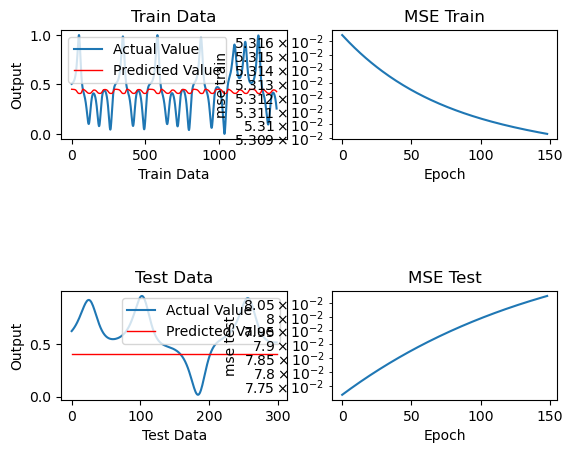

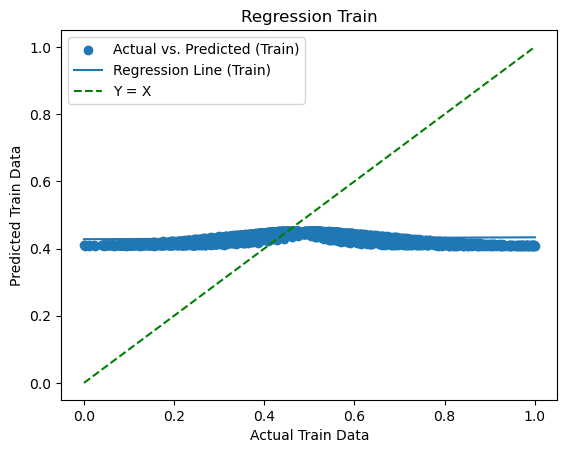

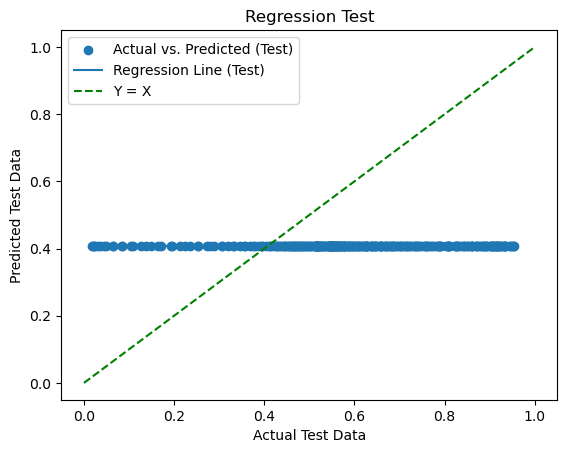

In [319]:
for t in range(epoch):
    error = np.zeros(num_train)
    for i in range(num_train):
        # Feedforward
        net2 , X = GMDH(o1[i] , w2_new, n2)
        o2 = pureline(net2)
        net3u = np.dot(w3u, o2)
        net3l = np.dot(w3l, o2)
        o3u = net3u
        o3l = net3l
        o3 = 0.5*o3u + 0.5*o3l
        o3real = output[i]
        error[i] = o3real - o3
        
        # update Rough layer
        gradw3u = -0.5*error[i]*o2
        w3u -= eta2*gradw3u

        gradw3l = -0.5*error[i]*o2
        w3l -= eta2*gradw3l
          
    error_square_train = np.zeros(num_train)
    output_data_train = np.zeros(num_train)   
    for i in range(num_train):
        # Feedforward
        net2 , X = GMDH(o1[i] , w2_new, n2)
        o2 = pureline(net2)
        net3u = np.dot(w3u, o2)
        net3l = np.dot(w3l, o2)
        o3u = net3u
        o3l = net3l
        o3 = 0.5*o3u + 0.5*o3l
        output_data_train[i]  = o3
        o3real = output[i]
        error[i] = o3real - o3
        error_square_train[i] = (error[i]) ** 2
    mse_train[t] = np.mean(error_square_train)
        
    error_square_validation = np.zeros(num_validation)
    output_data_validation  = np.zeros(num_validation)
    
    for i in range(num_validation):
        # Feedforward
        net2 , X = GMDH(o1[num_train+i] , w2_new, n2)
        o2 = pureline(net2)
        net3u = np.dot(w3u, o2)
        net3l = np.dot(w3l, o2)
        o3u = net3u
        o3l = net3l
        o3 = 0.5*o3u + 0.5*o3l
        output_data_validation[i]  = o3
        o3real = output[num_train+i]
        error[i] = o3real - o3
        error_square_validation[i] = (error[i]) ** 2
    #mse_validation[t] = np.mean(error_square_validation)
        
    error_square_test = np.zeros(num_test)
    output_data_test = np.zeros(num_test)
    for i in range(num_test):
        # Feedforward
        net2 , X = GMDH(o1[num_train+num_validation+i] , w2_new, n2)
        o2 = pureline(net2)
        net3u = np.dot(w3u, o2)
        net3l = np.dot(w3l, o2)
        o3u = net3u
        o3l = net3l
        o3 = 0.5*o3u + 0.5*o3l
        output_data_test[i]  = o3
        o3real = output[num_train+num_validation+i]
        error[i] = o3real - o3
        error_square_test[i] = (error[i]) ** 2
    mse_test[t] = np.mean(error_square_test)

    plt.subplot(3, 2, 1)
    plt.cla()  # Clear the previous plot
    plt.plot(output[:num_train], label="Actual Value")
    plt.plot(output_data_train, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Train Data')
    plt.xlabel('Train Data')
    plt.ylabel('Output')

    # The MSE train data plot
    plt.subplot(3, 2, 2)
    plt.cla()
    plt.semilogy(mse_train[:t])
    plt.title('MSE Train')
    plt.xlabel('Epoch')
    plt.ylabel('mse train')
    '''
    #fit validation
    plt.subplot(3, 2, 3)
    plt.cla()  # Clear the previous plot
    plt.plot(output[num_train: num_train + num_validation], label="Actual Value")
    plt.plot(output_data_validation, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Validation Data')
    plt.xlabel('Validation Data')
    plt.ylabel('Output')

    # The MSE validation data plot
    plt.subplot(3, 2, 4)
    plt.cla()
    plt.semilogy(mse_validation[:t])
    plt.title('MSE validation')
    plt.xlabel('Epoch')
    plt.ylabel('mse validation')
    '''
    # The test data plot
    plt.subplot(3, 2, 5)
    plt.cla()
    plt.plot(output[num_train + num_validation:num_data], label="Actual Value")
    plt.plot(output_data_test, 'r', linewidth=1, label="Predicted Value")
    plt.legend()
    plt.title('Test Data')
    plt.xlabel('Test Data')
    plt.ylabel('Output')

    # MSE test data plot
    plt.subplot(3, 2, 6)
    plt.cla()
    plt.semilogy(mse_test[:t])
    plt.title('MSE Test')
    plt.xlabel('Epoch')
    plt.ylabel('mse test')

    display(plt.gcf())
    clear_output(wait=True)


def plot_regression_line(x, y, label):
    coefficients = np.polyfit(x, y, 1)
    polynomial = np.poly1d(coefficients)
    x_line = np.linspace(min(x), max(x), 100)
    y_line = polynomial(x_line)
    plt.plot(x_line, y_line, label=label)

# Regression Train Plot
plt.figure(3)
plt.scatter(output[:num_train], output_data_train, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(output[:num_train], output_data_train, 'Regression Line (Train)')
plt.plot([min(output[:]), max(output[:])], [min(output[:]), max(output[:])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Train Data')
plt.ylabel('Predicted Train Data')
plt.title('Regression Train')
plt.legend()
plt.show()
'''
# Regression Validation Plot
plt.figure(4)
plt.scatter(output[num_train:num_train+num_validation], output_data_validation, label='Actual vs. Predicted (Train)', marker='o')
plot_regression_line(output[num_train: num_train + num_validation], output_data_validation, 'Regression Line (Train)')
plt.plot([min(output[:]), max(output[:])], [min(output[:]), max(output[:])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual validation Data')
plt.ylabel('Predicted validation Data')
plt.title('Regression validation')
plt.legend()
plt.show()
'''
# Regression Test Plot
plt.figure(5)
plt.scatter(output[num_train+num_validation:num_data], output_data_test, label='Actual vs. Predicted (Test)', marker='o')
plot_regression_line(output[num_train+num_validation:num_data], output_data_test, 'Regression Line (Test)')
plt.plot([min(output[:]), max(output[:])], [min(output[:]), max(output[:])], label='Y = X', color='green', linestyle='--')

plt.xlabel('Actual Test Data')
plt.ylabel('Predicted Test Data')
plt.title('Regression Test')
plt.legend()
plt.show()   

In [266]:
for i in range(300):
    print(data[i, :5])
    print('*************')
    print(rbf_kernel(data[i, :5], C, 3*sig))

[0.4936747  0.49594005 0.49797068 0.49980834 0.50149056]
*************
[0.92804592 0.98413964 0.3161311  0.97422218 0.95770692 0.8361611 ]
[0.49594005 0.49797068 0.49980834 0.50149056 0.50305096]
*************
[0.92800672 0.98413074 0.31592522 0.97420778 0.95768351 0.83607646]
[0.49797068 0.49980834 0.50149056 0.50305096 0.50452002]
*************
[0.92796443 0.98412113 0.31570327 0.97419226 0.95765826 0.83598517]
[0.49980834 0.50149056 0.50305096 0.50452002 0.50592521]
*************
[0.92791976 0.98411099 0.31546895 0.97417585 0.95763157 0.83588873]
[0.50149056 0.50305096 0.50452002 0.50592521 0.50729163]
*************
[0.92787293 0.98410036 0.31522351 0.97415866 0.95760361 0.83578765]
[0.50305096 0.50452002 0.50592521 0.50729163 0.50864233]
*************
[0.92782383 0.98408921 0.31496639 0.97414063 0.95757428 0.83568168]
[0.50452002 0.50592521 0.50729163 0.50864233 0.50999868]
*************
[0.92777208 0.98407746 0.31469557 0.97412163 0.95754337 0.83557   ]
[0.50592521 0.50729163 0.50

In [221]:
a

array([0.50562691, 0.89061843, 0.00742945, 0.81569932, 0.70618646])

In [223]:
b

array([0.50149056, 0.50305096, 0.50452002, 0.50592521, 0.50729163])